In [1]:
# filter some warning messages
import warnings
warnings.filterwarnings("ignore")

In [2]:
from myfunctions import *

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as colors
import matplotlib.path as mpath

In [3]:
import cmocean

In [4]:
datapd = pd.read_csv('List57.csv')

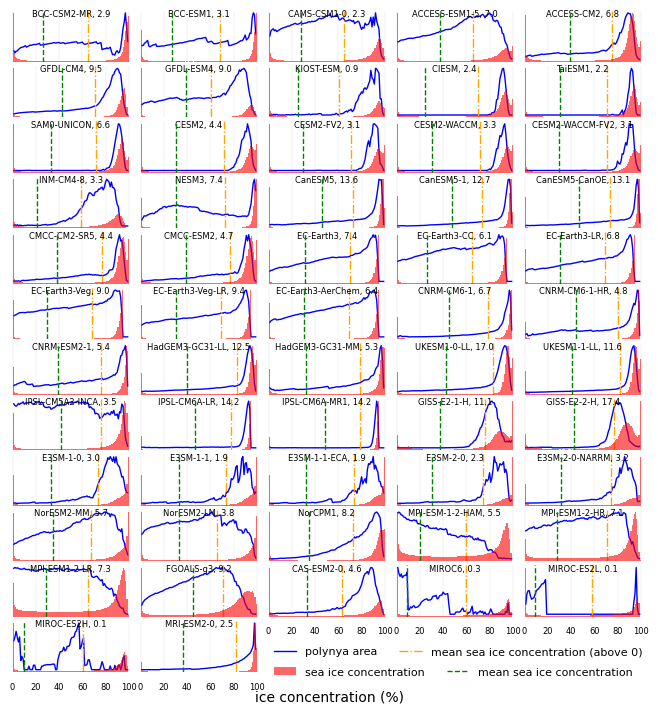

In [24]:
p0 = '../../SO_data/data_polynya_count/'
pice = '../../SO_data/data_siconc_w_area/'

fig = plt.figure(figsize=(6.5, 7))
n = 0
ice_thresholds = np.arange(0, 100, step=1)

for i in range(0, len(datapd)):
    name = datapd.at[i, 'source_id']
    if ispickleexists(name, p0) and ispickleexists(name, pice):
        n+=1
        ds = openpickle(name, p0)
        dssiconc = openpickle(name, pice)
        ice_mean = dssiconc.siconc.mean(skipna = True)
        ice_mean_not0 = dssiconc.siconc.where(dssiconc.siconc>0).mean(skipna = True)
        
        ax = fig.add_subplot(12, 5, n)
        plt.subplots_adjust(left=0.015,
                            bottom=0.045, 
                            right=0.985, 
                            top=0.99, 
                            wspace=0.08, 
                            hspace=0.08)
        
        pa = ax.plot(ice_thresholds[1:], ds[1:]/np.max(ds[1:]), linewidth = 1, 
                     color = 'b', label = 'polynya area')
        
        ax.set_ylim((-0.05, 1.05))
        ax.tick_params(labelsize = 6)
        
        titletext = "{}, {:.1f}".format(name, np.max(ds[1:])/1e12)
        ax.set_title(titletext, fontsize=6, y=1.0, pad=-4)
        # ax.text(5, 0.7, text_mean, fontsize = 6)
        
        ax.set_xlim((-1,101))
        ax.set_xticks([0,20,40,60,80,100])

        ax2 = ax.twinx()  # instantiate a second Axes that shares the same x-axis
        icevalues = dssiconc.siconc.values.flatten()
        icev = icevalues[icevalues>0]
        pb = ax2.hist(icev, bins=100, color = 'red', edgecolor=None,
                      alpha = 0.6, label = 'sea ice concentration')

        pc = ax2.axvline(x=ice_mean.values.item(), color = 'g', linestyle = '--',
                        linewidth=1, label = 'mean sea ice concentration')
        pd = ax.axvline(x=ice_mean_not0.values.item(), color = 'orange', linestyle = '-.',
                        linewidth=1, label = 'mean sea ice concentration (above 0)')

        

        if n<=52:
            ax.set_xticklabels([])            
        if n == 57:
            ax.set_xlabel('ice concentration (%)', fontsize=10)
            ax.xaxis.set_label_coords(1.6, -0.35)
            
        ax.set_yticklabels([])
        ax.set_frame_on(False)
        ax.tick_params(tick1On=False)
        ax2.set_yticklabels([])
        ax2.set_yticks([])
        ax2.set_frame_on(False)
        ax2.tick_params(tick1On=False)
        
        ax.xaxis.grid(True,'major', ls='-', lw=0.2, alpha = 0.6)
        if n == 57:
            l = ax.legend(fontsize = 8, frameon=False, loc='center left', bbox_to_anchor=(1.05, 0.4), ncol=2)
            l2 = ax2.legend(fontsize = 8, frameon=False, loc='center left', bbox_to_anchor=(1.05, 0), ncol=2)
        # break

# fig.savefig('Sup_PolynyaCounts.eps', format='eps')
fig.savefig('Sup_PolynyaCounts.pdf', format='pdf')

In [11]:
p0 = '../../SO_data/data_polynya_count/'

for i in range(0, len(datapd)):
    name = datapd.at[i, 'source_id']
    if ispickleexists(name, p0) and ispickleexists(name, pice):
        ds = openpickle(name, p0)
        areamax = ds[np.argmax(ds[1:])+1]
        
        break

In [10]:
ds[a+1]

2940439887872.0

In [9]:
ds

[341715451904.0,
 549946851328.0,
 422232752128.0,
 528865034240.0,
 537103302656.0,
 630819651584.0,
 692509212672.0,
 751974481920.0,
 775616200704.0,
 790841720832.0,
 827822440448.0,
 873261629440.0,
 780733513728.0,
 825829163008.0,
 857496485888.0,
 912370696192.0,
 890626310144.0,
 924688121856.0,
 942167097344.0,
 947913752576.0,
 947913752576.0,
 967615643648.0,
 985125617664.0,
 1023697485824.0,
 908362645504.0,
 917224226816.0,
 928833142784.0,
 934542311424.0,
 958146019328.0,
 969361915904.0,
 985109364736.0,
 995148693504.0,
 1015024451584.0,
 1015024451584.0,
 1035108810752.0,
 1057537851392.0,
 1069918453760.0,
 1033905569792.0,
 1053587668992.0,
 1067935989760.0,
 1080112906240.0,
 1024255066112.0,
 1030343491584.0,
 1059672948736.0,
 1058667167744.0,
 993394425856.0,
 1019368898560.0,
 1035117395968.0,
 1045737439232.0,
 1054396186624.0,
 1069758414848.0,
 1084304326656.0,
 1089821278208.0,
 1099084398592.0,
 1109337571328.0,
 1119174262784.0,
 1028697620480.0,
 10428

In [4]:
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

In [11]:
def plot_multi_map(datapd, ice_threshold, title_threshold=False, figsize = (7, 8)):
    fig = plt.figure(figsize=figsize)
    
    n = 1

    for i in range(0, len(datapd)):
        name = datapd.at[i, 'source_id']
        dataname = name + '_'+ str(ice_threshold)
        if not ispickleexists(dataname, '../../SO_data/data_polynya/'):
            continue
        ds = openpickle(dataname, '../../SO_data/data_polynya/')
        ax = fig.add_subplot(8, 8, n, projection=ccrs.SouthPolarStereo())
        plt.subplots_adjust(
            left=0.01,
            bottom=0.01,
            right=0.99,
            top=0.99,
            wspace=0.04,
            hspace=0.04
        )
        ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
        if title_threshold:
            if ice_threshold == 'mean':
                title = str(round(ds.threshold.values.item())) + '%'
            else:
                title = str(ice_threshold) + '%'
            ax.text(0,-90, title, fontsize=6)
        ax.set_title(name, fontsize=6, pad=-0.5)
        pltx = ds.newlon
        plty = ds.newlat
        ice_max = ds.ice_max
        polynya_freq = ds.polynya_freq
        ax.plot([pltx[0,0], pltx[0,0]],[-90, -40], color = 'red', 
                transform=ccrs.PlateCarree(), linewidth = 1)
        


        im = ax.pcolormesh(pltx, plty, ice_max, 
                           transform=ccrs.PlateCarree(), 
                           vmin=0, vmax=100, 
                           cmap=cmocean.cm.ice)
        
        im2 = ax.pcolormesh(pltx, plty, polynya_freq, 
                            transform=ccrs.PlateCarree(), 
                            vmin = 0, vmax = 0.20, cmap=plt.cm.Spectral)
        ax.add_feature(cfeature.LAND, zorder=1)#, color='0.8')
        ax.add_feature(cfeature.COASTLINE, linewidth=0.2)
        ax.set_boundary(circle, transform=ax.transAxes)
        
        n = n+1       
        
    cbar_ax1 = fig.add_axes([0.65, 0.11, 0.30, 0.01])
    cbar1 = fig.colorbar(im, cax=cbar_ax1, orientation='horizontal')
    cbar1.set_label('Maximum sea ice coverage (%)', size=8, labelpad=-0.1)
    cbar1.ax.tick_params(labelsize=6,direction='in') 
    
    cbar_ax2 = fig.add_axes([0.65, 0.06, 0.30, 0.01])
    cbar2 = fig.colorbar(im2, cax=cbar_ax2, orientation='horizontal')
    cbar2.set_label('Frequency of appearance', size=8, labelpad=-0.1)
    cbar2.ax.tick_params(labelsize=6,direction='in')
    savename = 'Polynya_Multi' + '_' + str(ice_threshold) + '.png'
    fig.savefig(savename, dpi = 300)


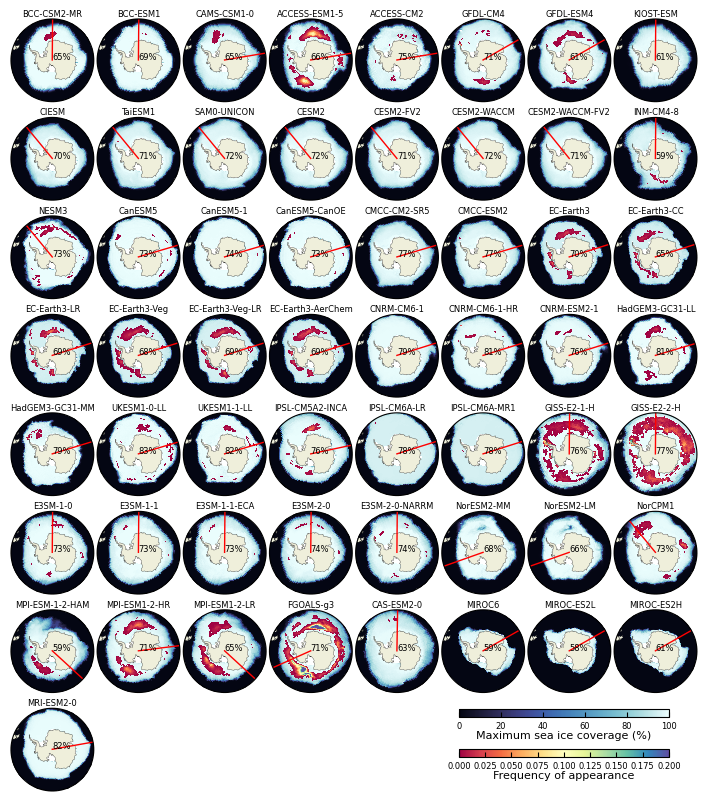

In [12]:
plot_multi_map(datapd, 'mean', title_threshold=True)

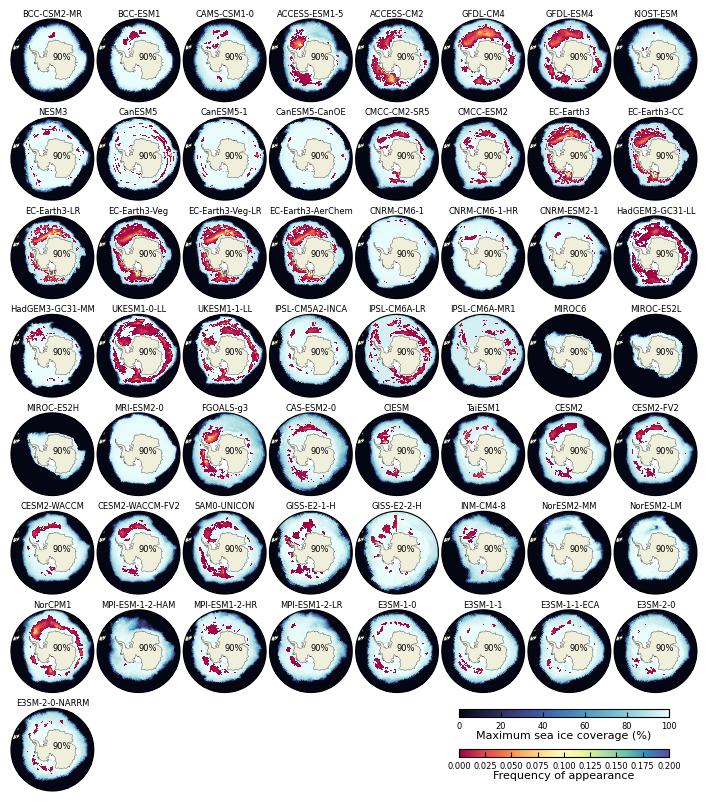

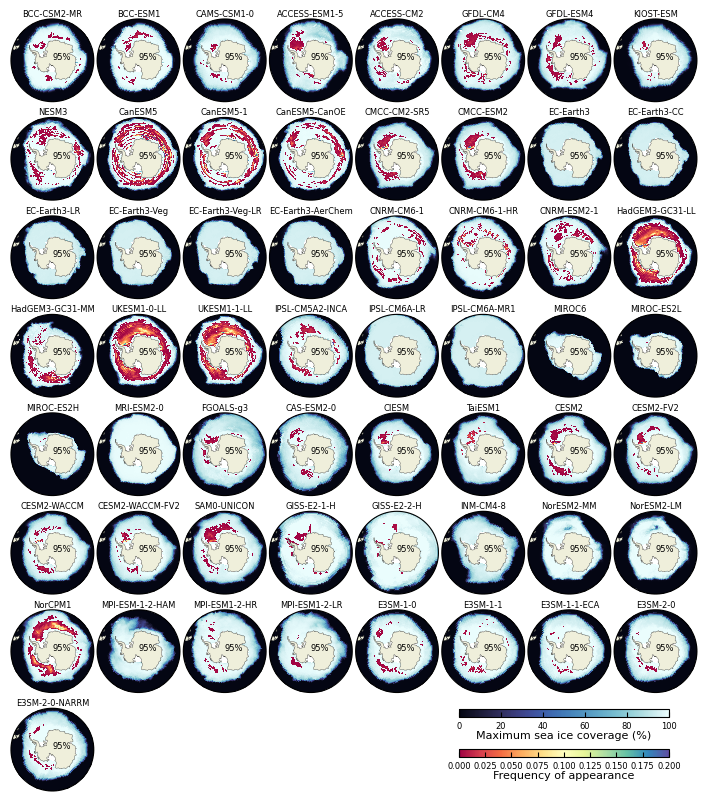

In [10]:
for ice_threshold in ice_thresholds:
    savename = 'Polynya_Multi' + '_' + str(ice_threshold) + '.png'
    if os.path.exists(savename):
        # print('    [o] {} exists.'.format(p))
        continue    
    plot_multi_map(datapd, ice_threshold, title_threshold=True)

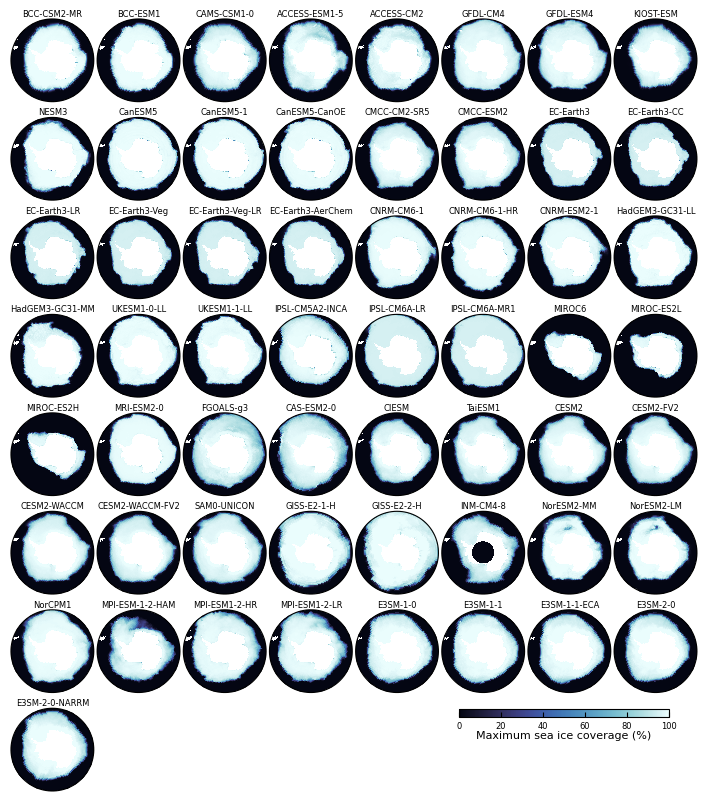

In [26]:
def plot_max_map(datapd, figsize = (7, 8)):
    fig = plt.figure(figsize=figsize)
    n = 1
    for i in range(0, len(datapd)):
        name = datapd.at[i, 'source_id']
        if not ispickleexists(name, 'data_siconc_w_area/'):
            continue
        ds = openpickle(name, 'data_siconc_w_area/')
        ax = fig.add_subplot(8, 8, n, projection=ccrs.SouthPolarStereo())
        plt.subplots_adjust(
            left=0.01,
            bottom=0.01,
            right=0.99,
            top=0.99,
            wspace=0.04,
            hspace=0.04
        )
        ax.set_extent([-180, 180, -90, -50], ccrs.PlateCarree())
    
        ax.set_title(name, fontsize=6, pad=-0.5)
        pltx = ds.newlon
        plty = ds.newlat
        ice_max = ds.siconc.max('time')
        
        im = ax.pcolormesh(pltx, plty, ice_max, 
                           transform=ccrs.PlateCarree(), 
                           vmin=0, vmax=100, 
                           cmap=cmocean.cm.ice)
        
        ax.set_boundary(circle, transform=ax.transAxes)
        
        n = n+1       
        
    cbar_ax1 = fig.add_axes([0.65, 0.11, 0.30, 0.01])
    cbar1 = fig.colorbar(im, cax=cbar_ax1, orientation='horizontal')
    cbar1.set_label('Maximum sea ice coverage (%)', size=8, labelpad=-0.1)
    cbar1.ax.tick_params(labelsize=6,direction='in')

plot_max_map(datapd)

In [94]:
ds = openpickle('FGOALS-g3', 'data_siconc_w_area/')